In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

font={'family':'serif',
      # 'style':'italic',  # 斜体
      'weight':'normal',
      # 'color':'red',
      'size': 18
}  
def setfigform_simple(xlabel, ylabel=None, xlimit = (None,None), ylimit = (None, None), xticks=None):
    # plt.legend(fontsize = 16, frameon=False),
    plt.xlabel(xlabel, fontdict = font)
    plt.ylabel(ylabel, fontdict = font)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    if xticks is None:
        plt.xticks(fontsize = font['size'], fontname = "serif")
    else:
        plt.xticks(xticks, fontsize = font['size'], fontname = "serif")
    plt.yticks(fontsize = font['size'], fontname = "serif")
    plt.tick_params(direction="in")
    
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

In [15]:

fes_magn_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline/epoch100_sample1/FES-magn-MC.dat", skiprows=1).T
fes_magn_d = np.loadtxt("../dirichlet-flow-matching/logs-dir-ising/latt4x4T4.0/kernel3x3/val_baseline/epoch137_sample1/FES-magn.dat", skiprows=1).T

fes_magn_g = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3/val_baseline/epoch100_sample1/FES-magn.dat", skiprows=1).T
fes_magn_gc = np.loadtxt("../dirichlet-flow-matching/logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss/val_baseline/epoch100/FES-magn.dat", skiprows=1).T


In [16]:
err_fes_magn_gc = fes_magn_gc[1]-fes_magn_ref[1]
print(err_fes_magn_gc)
mse_fes_magn_gc = np.sum((fes_magn_gc[1]-fes_magn_ref[1])**2)/fes_magn_gc.shape[1]
print(mse_fes_magn_gc)

err_fes_magn_g = fes_magn_g[1]-fes_magn_ref[1]
print(err_fes_magn_g)
mse_fes_magn_g= np.sum((fes_magn_g[1]-fes_magn_ref[1])**2)/fes_magn_g.shape[1]
print(mse_fes_magn_g)


err_fes_magn_d = fes_magn_d[1]-fes_magn_ref[1]
print(err_fes_magn_d)
mse_fes_magn_d= np.sum((fes_magn_d[1]-fes_magn_ref[1])**2)/fes_magn_d.shape[1]
print(mse_fes_magn_d)

[-0.582573 -0.170822  0.02031   0.203426  0.120865  0.12959  -0.059021
 -0.089336 -0.104286 -0.098758 -0.00107   0.104819  0.127401  0.128279
  0.127381 -0.281363 -0.424183]
0.046638710372529354
[ 0.655868  0.354678  0.261858  0.105151  0.14191   0.023959 -0.028281
 -0.070857 -0.18175  -0.16868  -0.104733 -0.179184 -0.1905   -0.082377
  0.208909  0.190426  0.818083]
0.09170127247552941
[ 2.149129  1.116125  0.504609  0.167217 -0.040123 -0.197965 -0.326255
 -0.227768 -0.282755 -0.309144 -0.270294 -0.232248 -0.136509 -0.055258
  0.482415  1.098308  1.868033]
0.6822918438801763


(2, 17)


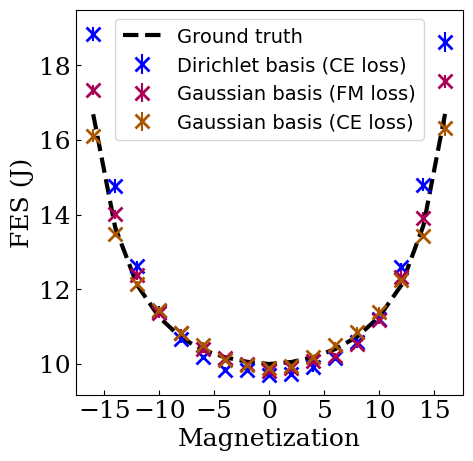

In [17]:
print(fes_magn_ref.shape)
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_magn_d[0], fes_magn_d[1], yerr=fes_magn_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_magn_g[0], fes_magn_g[1], yerr=fes_magn_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_magn_gc[0], fes_magn_gc[1], yerr=fes_magn_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_magn_ref[0], fes_magn_ref[1], label="Ground truth", c="k", linestyle="--", linewidth=3)
plt.legend(fontsize=font["size"]-4)
setfigform_simple("Magnetization", "FES (J)")


In [18]:
# Time embedding
fes_sqrmagn_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline/epoch200_sample1/FES-sqrmagn-MC.dat", skiprows=1).T
fes_sqrmagn_d = np.loadtxt("../dirichlet-flow-matching/logs-dir-ising/latt4x4T4.0/kernel3x3/val_baseline/epoch137_sample1/FES-sqrmagn.dat", skiprows=1).T
# Time embedding
fes_sqrmagn_g = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3/val_baseline/epoch100_sample1/FES-sqrmagn.dat", skiprows=1).T
fes_sqrmagn_gc = np.loadtxt("../dirichlet-flow-matching/logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss/val_baseline/epoch100/FES-sqrmagn.dat", skiprows=1).T


In [19]:

err_fes_sqrmagn_gc = fes_sqrmagn_gc[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_gc)
mse_fes_sqrmagn_gc = np.sum((fes_sqrmagn_gc[1]-fes_sqrmagn_ref[1])**2)/fes_sqrmagn_d.shape[1]
print(mse_fes_sqrmagn_gc/(16*16))

err_fes_sqrmagn_g = fes_sqrmagn_g[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_g)
mse_fes_sqrmagn_g = np.sum((fes_sqrmagn_g[1]-fes_sqrmagn_ref[1])**2)/fes_sqrmagn_d.shape[1]
print(mse_fes_sqrmagn_g/(16*16))

err_fes_sqrmagn_d = fes_sqrmagn_d[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_d)
mse_fes_sqrmagn_d = np.sum((fes_sqrmagn_d[1]-fes_sqrmagn_ref[1])**2)/fes_sqrmagn_d.shape[1]
print(mse_fes_sqrmagn_d/(16*16))

[11.633861 21.776433 19.050837 10.693277  4.523171  0.668692 -1.471482
 -1.896804]
0.5437058930405042
[ 2.475188  6.626248  4.232906  0.644863 -1.391804 -2.757455 -2.737962
 -2.260992]
0.04419739105244248
[ -8.393946 -10.155266 -11.259992 -10.109532  -8.282022  -7.234506
  -4.89817   -3.239541]
0.2724582396449517


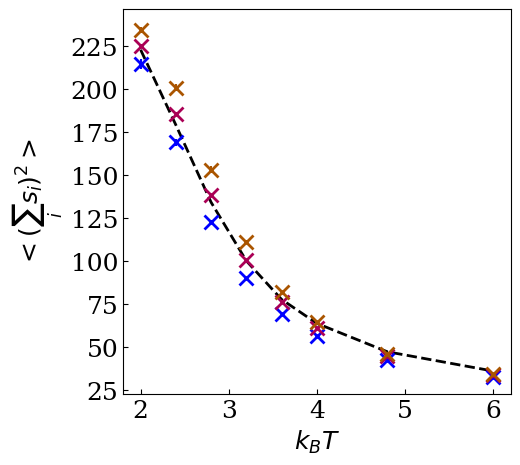

In [20]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_sqrmagn_d[0], fes_sqrmagn_d[1], yerr=fes_sqrmagn_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_sqrmagn_g[0], fes_sqrmagn_g[1], yerr=fes_sqrmagn_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_sqrmagn_gc[0], fes_sqrmagn_gc[1], yerr=fes_sqrmagn_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_sqrmagn_ref[0], fes_sqrmagn_ref[1], label="Ground truth", c="k", linestyle="--", linewidth=2)
plt.legend(fontsize=font["size"]-4)
setfigform_simple("$k_BT$", "$<(\sum_i s_i)^2>$", xticks=np.arange(2.0, 6.4, 1.0))

In [21]:
# Time embedding
fes_ssf_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline/epoch200_sample1/FES-ssf-MC.dat", skiprows=1).T
fes_ssf_d = np.loadtxt("../dirichlet-flow-matching/logs-dir-ising/latt4x4T4.0/kernel3x3/val_baseline/epoch137_sample1/FES-ssf.dat", skiprows=1).T
# Time embedding
fes_ssf_g = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3/val_baseline/epoch100_sample1/FES-ssf.dat", skiprows=1).T
fes_ssf_gc = np.loadtxt("../dirichlet-flow-matching/logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss/val_baseline/epoch100/FES-ssf.dat", skiprows=1).T


In [22]:

print(fes_ssf_gc[0])
err_fes_ssf_gc = fes_ssf_gc[1]-fes_ssf_ref[1]
print(err_fes_ssf_gc)
mse_fes_ssf_gc = np.sum((fes_ssf_gc[1]-fes_ssf_ref[1])**2)/fes_ssf_gc.shape[1]
print(mse_fes_ssf_gc)

print(fes_ssf_g[0])
err_fes_ssf_g= fes_ssf_g[1]-fes_ssf_ref[1]
print(err_fes_ssf_g)
mse_fes_ssf_g= np.sum((fes_ssf_g[1]-fes_ssf_ref[1])**2)/fes_ssf_g.shape[1]
print(mse_fes_ssf_g)

print(fes_ssf_d[0])
err_fes_ssf_d = fes_ssf_d[1]-fes_ssf_ref[1]
print(err_fes_ssf_d)
mse_fes_ssf_d = np.sum((fes_ssf_d[1]-fes_ssf_ref[1])**2)/fes_ssf_g.shape[1]
print(mse_fes_ssf_d)

[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[ 0.002451  0.080867  0.134582  0.109048  0.055323  0.020979 -0.006873
 -0.008073]
0.005020303043250005
[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[-0.011242  0.054294  0.080137  0.050965  0.015882 -0.002176 -0.012459
 -0.010122]
0.0015760306823750017
[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[-0.02984   0.026085  0.014929 -0.017679 -0.031649 -0.031629 -0.021205
 -0.014133]
0.0005947151828750005


In [13]:
idx_order_ref = np.argsort(fes_ssf_ref[0])

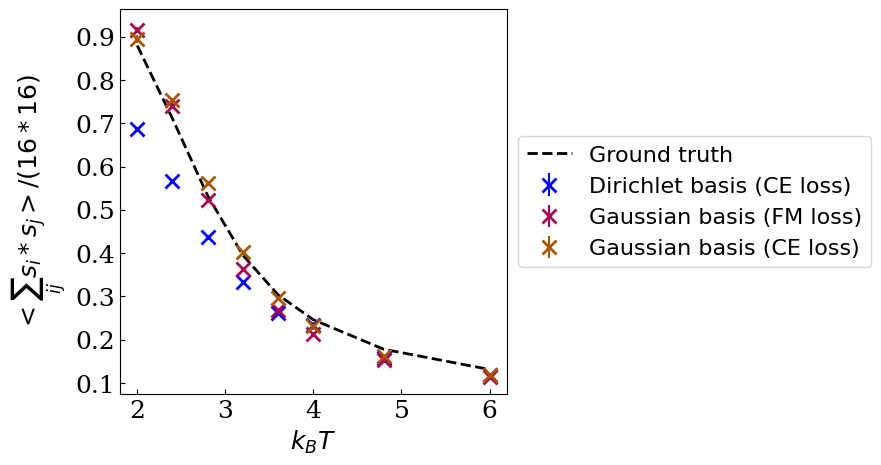

In [14]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_ssf_d[0], fes_ssf_d[1], yerr=fes_ssf_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_ssf_g[0], fes_ssf_g[1], yerr=fes_ssf_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_ssf_gc[0], fes_ssf_gc[1], yerr=fes_ssf_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_ssf_ref[0][idx_order_ref], fes_ssf_ref[1][idx_order_ref], label="Ground truth", c="k", linestyle="--", linewidth=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font["size"]-2)
setfigform_simple("$k_BT$", "$<\sum_{ij} s_i*s_j>/(16*16)$", xticks=np.arange(2.0, 6.4, 1.0))

# 6x6 lattice

In [15]:
# Time embedding
fes_magn_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-magn-MC.dat", skiprows=1).T
fes_magn_d = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-magn.dat", skiprows=1).T

# Time embedding
fes_magn_g = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-magn.dat", skiprows=1).T
fes_magn_gc = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-magn.dat", skiprows=1).T


In [16]:
print(fes_magn_d[0])
print(fes_magn_ref[0])


err_fes_magn_gc = fes_magn_gc[1]-fes_magn_ref[1]
print(err_fes_magn_gc)
mse_fes_magn_gc = np.sum(((fes_magn_gc[1]-fes_magn_ref[1]))**2)/fes_magn_d.shape[1]
print(mse_fes_magn_gc)


err_fes_magn_g = fes_magn_g[1]-fes_magn_ref[1]
print(err_fes_magn_g)
mse_fes_magn_g = np.sum(((fes_magn_g[1]-fes_magn_ref[1]))**2)/fes_magn_d.shape[1]
print(mse_fes_magn_g)

err_fes_magn_d = fes_magn_d[1]-fes_magn_ref[1]
print(err_fes_magn_d)
mse_fes_magn_d = np.sum(((fes_magn_d[1]-fes_magn_ref[1]))**2)/fes_magn_d.shape[1]
print(mse_fes_magn_d)

[-36. -34. -32. -30. -28. -26. -24. -22. -20. -18. -16. -14. -12. -10.
  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.  14.  16.  18.
  20.  22.  24.  26.  28.  30.  32.  34.  36.]
[-36. -34. -32. -30. -28. -26. -24. -22. -20. -18. -16. -14. -12. -10.
  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.  14.  16.  18.
  20.  22.  24.  26.  28.  30.  32.  34.  36.]
[ 4.41392   2.253019  1.515138  0.131211  0.2226   -0.281724 -0.295226
 -0.48421  -0.387025 -0.440106 -0.260981 -0.069832 -0.170595 -0.071292
 -0.066538  0.127792  0.129661  0.077176  0.157379  0.208642  0.221385
  0.14182   0.110965  0.163147 -0.119834 -0.252964 -0.184285 -0.29239
 -0.111118 -0.08547   0.436099  0.370031 -0.046209  0.977693  1.593687
  5.084879  2.770331]
1.7720503328958401
[-1.131258e+00  1.523733e+00  1.767854e+00  3.631600e-01  4.878050e-01
  2.131470e-01  6.201400e-01  2.770330e-01  2.979710e-01  2.261470e-01
  3.455840e-01  2.773370e-01  1.669030e-01  2.882200e-01  2.705150e-01
  1.950200e-01

(2, 37)


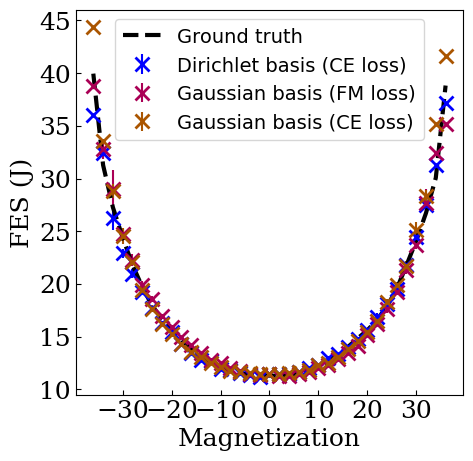

In [17]:
print(fes_magn_ref.shape)
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_magn_d[0], fes_magn_d[1], yerr=fes_magn_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_magn_g[0], fes_magn_g[1], yerr=fes_magn_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_magn_gc[0], fes_magn_gc[1], yerr=fes_magn_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_magn_ref[0], fes_magn_ref[1], label="Ground truth", c="k", linestyle="--", linewidth=3)
plt.legend(fontsize=font["size"]-4)
setfigform_simple("Magnetization", "FES (J)")


In [18]:
# Time embedding
fes_sqrmagn_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-sqrmagn-MC.dat", skiprows=1).T
fes_sqrmagn_d = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-sqrmagn.dat", skiprows=1).T

# Time embedding
fes_sqrmagn_g = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-sqrmagn.dat", skiprows=1).T
fes_sqrmagn_gc = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-sqrmagn.dat", skiprows=1).T

In [20]:
print(fes_sqrmagn_d[0])
print(fes_sqrmagn_ref[0])
err_fes_sqrmagn_gc = fes_sqrmagn_gc[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_gc)
mse_fes_sqrmagn_gc = np.sum(((fes_sqrmagn_gc[1]-fes_sqrmagn_ref[1]))**2)/fes_sqrmagn_gc.shape[1]
print(mse_fes_sqrmagn_gc/(36*36))

err_fes_sqrmagn_g = fes_sqrmagn_g[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_g)
mse_fes_sqrmagn_g = np.sum(((fes_sqrmagn_g[1]-fes_sqrmagn_ref[1]))**2)/fes_sqrmagn_gc.shape[1]
print(mse_fes_sqrmagn_g/(36*36))

err_fes_sqrmagn_d = fes_sqrmagn_d[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_d)
mse_fes_sqrmagn_d = np.sum(((fes_sqrmagn_d[1]-fes_sqrmagn_ref[1]))**2)/fes_sqrmagn_gc.shape[1]
print(mse_fes_sqrmagn_d/(36*36))

[2.  2.4 2.8 3.2 3.6 4.  4.8 6. ]
[2.  2.4 2.8 3.2 3.6 4.  4.8 6. ]
[-23.253752  49.058284  69.665172  27.851073  11.0812     2.815886
  -3.370068  -4.680482]
0.8430128419777223
[ 75.263405 184.874428 139.966354  41.325651  11.530779   0.950713
  -5.274267  -5.963784]
5.91616235288286
[ 66.509092 197.058563 174.725958  61.021431  19.321528   4.297942
  -4.31037   -5.653536]
7.518388070903293


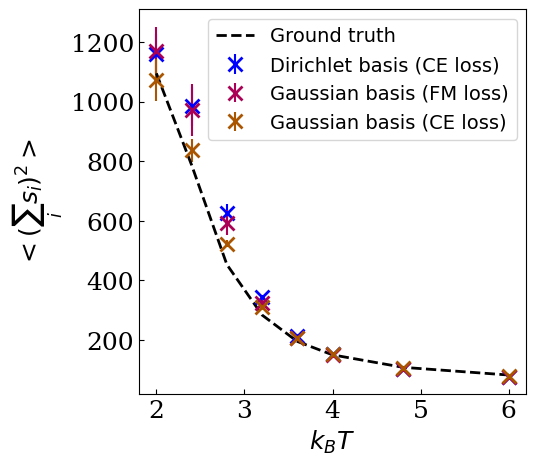

In [21]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_sqrmagn_d[0], fes_sqrmagn_d[1], yerr=fes_sqrmagn_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_sqrmagn_g[0], fes_sqrmagn_g[1], yerr=fes_sqrmagn_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_sqrmagn_gc[0], fes_sqrmagn_gc[1], yerr=fes_sqrmagn_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_sqrmagn_ref[0], fes_sqrmagn_ref[1], label="Ground truth", c="k", linestyle="--", linewidth=2)
plt.legend(fontsize=font["size"]-4)
setfigform_simple("$k_BT$", "$<(\sum_i s_i)^2>$", xticks=np.arange(2.0, 6.4, 1.0))

In [22]:
# Time embedding
fes_ssf_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-ssf-MC.dat", skiprows=1).T
fes_ssf_d = np.loadtxt(f"logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-ssf.dat", skiprows=1).T
# Time embedding
fes_ssf_g = np.loadtxt(f"logs-gaussian-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-ssf.dat", skiprows=1).T
fes_ssf_gc = np.loadtxt(f"logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss_timeembed/val_baseline_latt6x6/epoch200_sample1/FES-ssf.dat", skiprows=1).T


In [23]:
print(fes_ssf_d[0])
print(fes_ssf_ref[0])
err_fes_ssf_gc = fes_ssf_gc[1]-fes_ssf_ref[1]
print(err_fes_ssf_gc)
mse_fes_ssf_gc = np.sum(((fes_ssf_gc[1]-fes_ssf_ref[1]))**2)/fes_ssf_gc.shape[1]
print(mse_fes_ssf_gc)

err_fes_ssf_g = fes_ssf_g[1]-fes_ssf_ref[1]
print(err_fes_ssf_g)
mse_fes_ssf_g = np.sum(((fes_ssf_g[1]-fes_ssf_ref[1]))**2)/fes_ssf_gc.shape[1]
print(mse_fes_ssf_g)

err_fes_ssf_d = fes_ssf_d[1]-fes_ssf_ref[1]
print(err_fes_ssf_d)
mse_fes_ssf_d = np.sum(((fes_ssf_d[1]-fes_ssf_ref[1]))**2)/fes_ssf_gc.shape[1]
print(mse_fes_ssf_d)

[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[ 0.003057 -0.258938 -0.124071 -0.017417  0.00046   0.003066 -0.001632
 -0.002642]
0.010346806695875
[ 0.001336 -0.464843 -0.305624 -0.134014 -0.06007  -0.02748  -0.007485
 -0.00454 ]
0.04148584665525
[ 0.003432 -0.272803 -0.141305 -0.027677 -0.003213  0.001847 -0.002052
 -0.003001]
0.01189916578375


In [24]:
idx_order_ref = np.argsort(fes_ssf_ref[0])

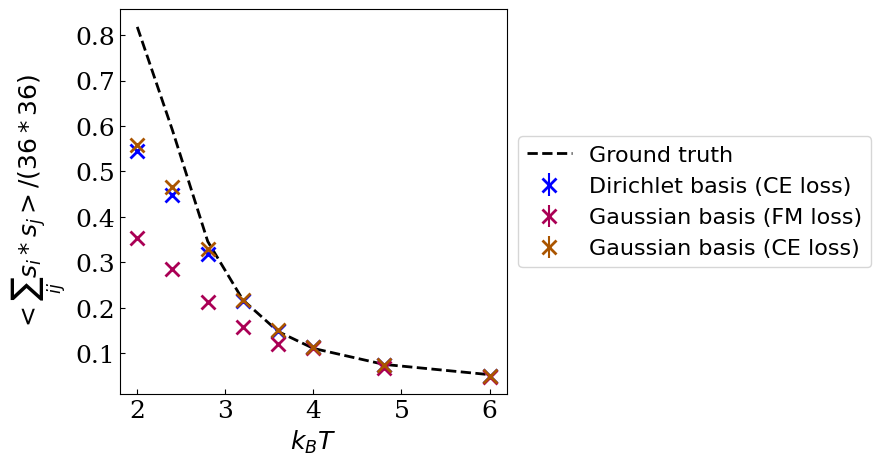

In [25]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_ssf_d[0], fes_ssf_d[1], yerr=fes_ssf_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_ssf_g[0], fes_ssf_g[1], yerr=fes_ssf_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_ssf_gc[0], fes_ssf_gc[1], yerr=fes_ssf_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_ssf_ref[0][idx_order_ref], fes_ssf_ref[1][idx_order_ref], label="Ground truth", c="k", linestyle="--", linewidth=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font["size"]-2)
setfigform_simple("$k_BT$", "$<\sum_{ij} s_i*s_j>/(36*36)$", xticks=np.arange(2.0, 6.4, 1.0))

In [3]:
# Time embedding
fes_ssf_d_2 = np.loadtxt(f"logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample1/FES-ssf-B{655360}.dat", skiprows=1).T
# Time embedding
fes_ssf_g_2 = np.loadtxt(f"logs-gaussian-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample1/FES-ssf{655360}.dat", skiprows=1).T
fes_ssf_gc_2 = np.loadtxt(f"logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss_timeembed/val_baseline_latt6x6/epoch100_sample1/FES-ssf{655360}.dat", skiprows=1).T


In [104]:
print(fes_ssf_d_2[0])
print(fes_ssf_ref[0])
err_fes_ssf_d_2 = fes_ssf_d_2[1]-fes_ssf_ref[1]
print(err_fes_ssf_d_2)
mse_fes_ssf_d_2 = np.sum(((fes_ssf_d_2[1]-fes_ssf_ref[1]))**2)/fes_ssf_d_2.shape[1]
print(mse_fes_ssf_d_2)

[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[ 0.0057   -0.244133 -0.093622  0.010652  0.014494  0.008389 -0.001799
 -0.002972]
0.008600559527374999


In [4]:
# Time embedding
fes_ssf_d_3 = np.loadtxt(f"logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample1/FES-ssf-B{52396032}.dat", skiprows=1).T


In [5]:
print(fes_ssf_d_3[0])
print(fes_ssf_ref[0])
err_fes_ssf_d_3 = fes_ssf_d_3[1]-fes_ssf_ref[1]
print(err_fes_ssf_d_3)
mse_fes_ssf_d_3 = np.sum(((fes_ssf_d_3[1]-fes_ssf_ref[1]))**2)/fes_ssf_d_3.shape[1]
print(mse_fes_ssf_d_3)

[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[ 0.0057   -0.049624  0.064782  0.088024  0.037838  0.015005 -0.001289
 -0.002791]
0.0020132848683749997


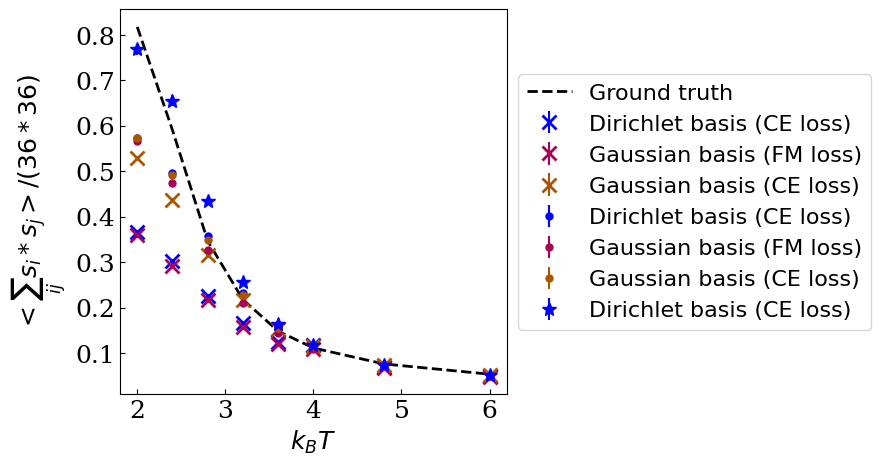

In [110]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_ssf_d[0], fes_ssf_d[1], yerr=fes_ssf_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_ssf_g[0], fes_ssf_g[1], yerr=fes_ssf_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_ssf_gc[0], fes_ssf_gc[1], yerr=fes_ssf_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])


plt.errorbar(fes_ssf_d_2[0], fes_ssf_d_2[1], yerr=fes_ssf_d_2[2], label="Dirichlet basis (CE loss)", marker="o", linestyle="", markersize=5, c=line_color[0])
plt.errorbar(fes_ssf_g_2[0], fes_ssf_g_2[1], yerr=fes_ssf_g_2[2], label="Gaussian basis (FM loss)", marker="o", linestyle="", markersize=5, c=line_color[1])
plt.errorbar(fes_ssf_gc_2[0], fes_ssf_gc_2[1], yerr=fes_ssf_gc_2[2], label="Gaussian basis (CE loss)", marker="o", linestyle="", markersize=5, c=line_color[2])

plt.errorbar(fes_ssf_d_3[0], fes_ssf_d_3[1], yerr=fes_ssf_d_3[2], label="Dirichlet basis (CE loss)", marker="*", linestyle="", markersize=10, c=line_color[0])

plt.plot(fes_ssf_ref[0][idx_order_ref], fes_ssf_ref[1][idx_order_ref], label="Ground truth", c="k", linestyle="--", linewidth=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font["size"]-2)
setfigform_simple("$k_BT$", "$<\sum_{ij} s_i*s_j>/(36*36)$", xticks=np.arange(2.0, 6.4, 1.0))